<a href="https://colab.research.google.com/github/Zia-Ul-Hasan/Dip-Lab/blob/main/lab_13_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

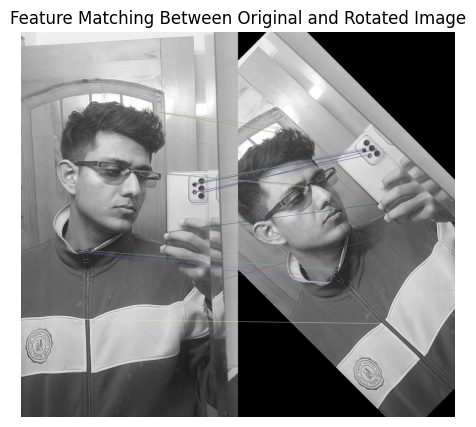

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def face_feature_detection(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    (h, w) = img.shape
    center = (w // 2, h // 2)
    angle = 45
    scale = 1.0
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))
    orb = cv2.ORB_create()
    keypoints1, descriptors1 = orb.detectAndCompute(img, None)
    keypoints2, descriptors2 = orb.detectAndCompute(rotated_img, None)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)
    match_img = cv2.drawMatches(img, keypoints1, rotated_img, keypoints2, matches[:20], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(10, 5))
    plt.imshow(match_img, cmap='gray')
    plt.title('Feature Matching Between Original and Rotated Image')
    plt.axis('off')
    plt.show()
img1='/content/image_2024-12-23_235537376.png'
face_feature_detection(img1)

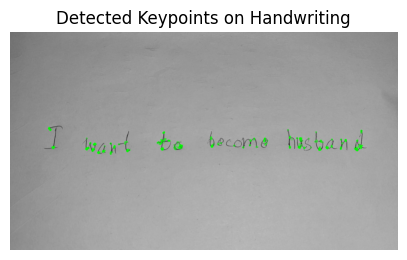

In [3]:
def handwriting_detection(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    orb = cv2.ORB_create()
    keypoints, descriptors = orb.detectAndCompute(img, None)
    img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=0)
    plt.figure(figsize=(5, 5))
    plt.imshow(img_with_keypoints, cmap='gray')
    plt.title('Detected Keypoints on Handwriting')
    plt.axis('off')
    plt.show()
img2='/content/image_2024-12-24_000045579.png'
handwriting_detection(img2)